In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
white_data=pd.read_csv('winequality-white.csv')
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_data.sort_values(by=['residual sugar', 'quality'], ascending = False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


In [5]:
white_data = white_data.drop(["residual sugar","sulphates"], axis= 1)
white_data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,8.8,6
1,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,9.5,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,10.1,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,9.9,6
4,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,9.9,6


In [6]:
white_data.drop(white_data[white_data["quality"]<3.5].index, inplace=True)
white_data.count()

fixed acidity           4878
volatile acidity        4878
citric acid             4878
chlorides               4878
free sulfur dioxide     4878
total sulfur dioxide    4878
density                 4878
pH                      4878
alcohol                 4878
quality                 4878
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

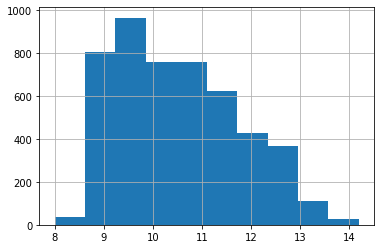

In [12]:
white_data["alcohol"].hist()

In [13]:
white_data["al"] = pd.cut(white_data["alcohol"],bins = [0., 9.0, 10.0, 11.0, 12.0, np.inf],labels=[1, 2, 3, 4, 5])

In [14]:
white_data["al"].value_counts()

2    1577
3    1244
4     848
5     709
1     500
Name: al, dtype: int64

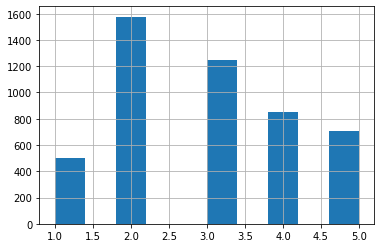

In [15]:
white_data["al"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(white_data, white_data["al"]):
    strat_train_set = white_data.loc[train_index]
    strat_test_set = white_data.loc[test_index]

/Users/mkhoi/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/mkhoi/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [17]:
strat_test_set["al"].value_counts() / len(strat_test_set)

2    0.322746
3    0.239754
4    0.171107
5    0.152664
1    0.110656
Name: al, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
white_data["al"].value_counts() / len(white_data)
def al_proportions(data):
    return white_data["al"].value_counts() / len(data)

train_set, test_set = train_test_split(white_data, test_size=0.2, random_state=42)


In [19]:
Y_test = test_set.quality
X_test = test_set.drop("quality",axis = 1)
Y_train = train_set.quality
X_train = train_set.drop("quality", axis = 1)
X_train.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,al
2755,6.6,0.34,0.18,0.082,47.0,240.0,0.99710,3.42,9.2,2
4133,5.7,0.25,0.27,0.040,24.0,120.0,0.99411,3.33,10.8,3
1266,7.5,0.28,0.34,0.028,36.0,116.0,0.99100,2.99,12.3,5
569,6.5,0.28,0.27,0.040,44.0,179.0,0.99480,3.19,9.4,2
4099,6.4,0.50,0.20,0.059,19.0,112.0,0.99314,3.18,9.2,2


In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
#X_train = sc.fit_transform(X_train)
X_test=pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)
#X_test = sc.transform(X_test)

#Classifier
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(n_estimators = 10, max_features = 10, criterion = 'entropy', random_state = 42)
forest_class.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = forest_class.predict(X_test)
print('Test set score is', forest_class.score(X_test, Y_test))
print('Training set score is', forest_class.score(X_train,Y_train))

Test set score is 0.6219262295081968
Training set score is 0.9856483854433624
